<a href="https://colab.research.google.com/github/saba6099/Deep-Learning-for-vision/blob/master/Multiple_optimizers_and_activation_fns_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import random as rand
import numpy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
batch_size = 100
n_iters = 2000
num_epochs = n_iters / (len(trainset) / batch_size)
num_epochs = int(num_epochs)
 
train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
input_dim = 32*32*3
hidden_dim = 1500
output_dim = 10
 

In [0]:
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation_func):
        super(LogisticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.drop = nn.Dropout(0.2)
        self.activation_func = activation_func
        self.fc2 = nn.Linear(hidden_dim, 200)
        self.fc3 = nn.Linear(200, 10)
      
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.drop(out)
        out = self.activation_func(out)

        out = self.fc2(out)
        out = self.drop(out)
        out = self.activation_func(out)

        out = self.fc3(out)

        return out
 

In [0]:
if torch.cuda.is_available():
    avDev = torch.device("cuda")
else:
    avDev = torch.device("cpu")

print(avDev)

cuda


In [0]:
    def train_model(model, optimizer, num_epochs):
      iter = 0
      pred_test_results = []
      labels_test_results = []
      loss_values = []
      num_updates = 0
      reg_lambda= 1e-6
      print("Training.....") 
      t0 = time.time()
      for epoch in range(num_epochs):
          running_loss = 0.0
          batch_loss = 0
          for i, (images, labels) in enumerate(train_loader):
              
            
              images = Variable(images.view(-1, 32*32*3)).to(avDev)
              labels = Variable(labels).to(avDev)
              
              # Clear gradients w.r.t. parameters
              optimizer.zero_grad()
              
              # Forward pass to get output/logits
              outputs = model(images)
              l1_reg = None
              for W in model.parameters():
                if l1_reg is None:
                  l1_reg = W.norm(1)
                else:
                  l1_reg = l1_reg + W.norm(1)
              
              loss = criterion(outputs, labels) + l1_reg * reg_lambda
              # loss = criterion(outputs, labels)
              
              # Getting gradients w.r.t. parameters
              loss.backward()
              batch_loss += loss.item()
              
              # Updating parameters
              optimizer.step()
              
              iter += 1
          # print("Epoch:", epoch+1, " Loss:", batch_loss/len(train_loader))
          loss_values.append(batch_loss)

      time_taken.append(time.time() - t0)     
      print("Training ended, time taken:", time.time() - t0)
      plt.plot(range(len(loss_values)),loss_values, label = optim)
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.legend()
      return model

In [0]:
def test_model(model):
  
  correct = 0
  total = 0
  num_updates = 0
  # Iterate through test dataset
  for images, labels in test_loader:
      #######################
      #  USE GPU FOR MODEL  #
      #######################
      images = Variable(images.view(-1, 32*32*3)).to(avDev)
      # Forward pass only to get logits/output
      outputs = model(images)
                  
      # Get predictions from the maximum value
                  
      _, predicted = torch.max(outputs.data, 1)
      predicted1 = predicted
      pred_list = predicted1.tolist()
      pred_test_results.extend(pred_list)
      
      labels1 = labels
      labels_list = labels1.tolist()
      labels_test_results.extend(labels_list)
              
      correct += (predicted.cpu() == labels.cpu()).sum().float()
      # Total number of labels
      total += labels.size(0)
                  
      #######################
      #  USE GPU FOR MODEL  #
      #######################
      
      num_updates +=1 

  pred_test_numpy = np.asarray(pred_test_results)

  labels_test_numpy = np.asarray(labels_test_results)
  accuracy = 100 * (correct / total)
  accuracy_list.append(accuracy.item())
  print("Accuracy on total test data: {}%".format(accuracy.item()))
  print("Confusion Matrix\n", confusion_matrix(pred_test_numpy, labels_test_numpy), "\n\n")

Number of epochs:  5
##### Activation Function: ReLU() #####
Optimizer: SGD
Training.....
Training ended, time taken: 42.61439919471741
Accuracy on total test data: 50.18000030517578%
Confusion Matrix
 [[21169  1811  3788  1410  1929  1079   316  1572  4291  1962]
 [ 1610 22392  1286  1421   790   856   993  1080  2626  6845]
 [ 2085   677 11870  3195  4716  3253  2697  1826   574   489]
 [  939  1040  2930 10718  2180  6558  3247  2320   903  1207]
 [ 1086   625  5814  2550 15247  2857  4457  3605   592   494]
 [  736   829  3091  7895  2226 14792  2527  2820  1177   747]
 [  997  1051  4867  5478  5558  3487 21849  1491   350  1220]
 [ 1576  1130  3281  2822  4447  3492  1353 20993   665  1987]
 [ 6517  3218  1253  1499  1113  1616   613   919 25052  3248]
 [ 2285  6227   820  2012   794  1010   948  2374  2770 20801]] 


Optimizer: Adam
Training.....
Training ended, time taken: 44.040645360946655
Accuracy on total test data: 54.43000030517578%
Confusion Matrix
 [[21760  1847  3855  

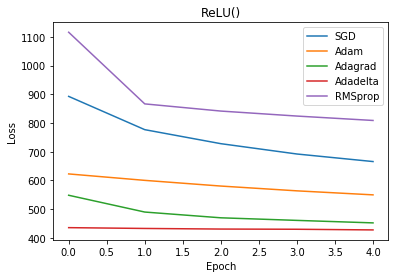

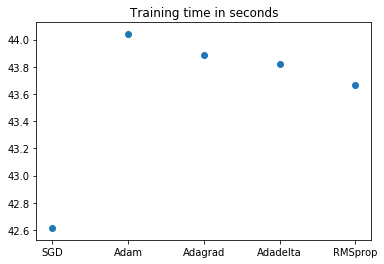

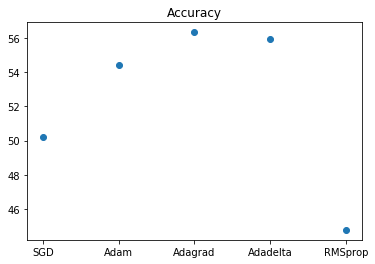

##### Activation Function: Tanh() #####
Optimizer: SGD
Training.....
Training ended, time taken: 42.12529897689819
Accuracy on total test data: 45.869998931884766%
Confusion Matrix
 [[24051  1998  4191  1549  2143  1179   350  1715  4810  2177]
 [ 1806 25438  1383  1542   843   924  1073  1153  2960  7693]
 [ 2354   797 13680  3568  5425  3666  3049  2060   661   555]
 [ 1042  1187  3363 12371  2447  7541  3630  2629  1026  1362]
 [ 1270   679  6465  2851 17295  3186  4899  3999   695   571]
 [  837   900  3483  8791  2467 16753  2716  3184  1284   853]
 [ 1128  1187  5459  6237  6276  3920 25070  1650   408  1350]
 [ 1785  1260  3672  3177  4984  3915  1482 23978   727  2235]
 [ 7165  3562  1380  1674  1232  1789   678  1007 28324  3545]
 [ 2562  6992   924  2240   888  1127  1053  2625  3105 23659]] 


Optimizer: Adam
Training.....
Training ended, time taken: 43.96097493171692
Accuracy on total test data: 48.62999725341797%
Confusion Matrix
 [[24636  2052  4291  1582  2193  1213   36

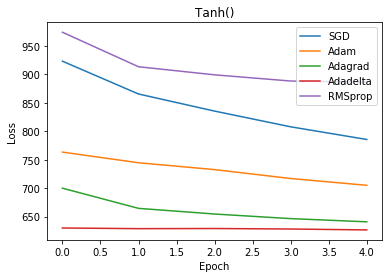

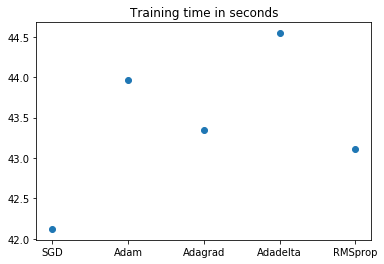

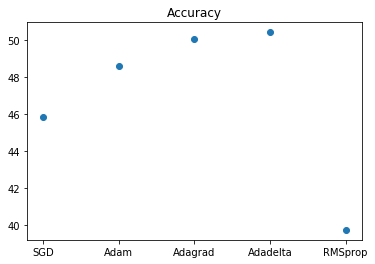

##### Activation Function: Sigmoid() #####
Optimizer: SGD
Training.....
Training ended, time taken: 42.27474546432495
Accuracy on total test data: 36.07999801635742%
Confusion Matrix
 [[26672  2209  4711  1737  2373  1340   419  1948  5408  2437]
 [ 2033 28220  1623  1801   963  1096  1232  1352  3308  8565]
 [ 2601   941 15102  4040  6135  4119  3463  2374   742   623]
 [ 1145  1305  3661 13593  2672  8275  3970  2881  1119  1489]
 [ 1384   756  7170  3205 19092  3563  5498  4433   773   648]
 [  973  1031  3879  9742  2775 18530  3016  3543  1485   966]
 [ 1239  1350  6161  6961  7092  4455 27800  1904   458  1505]
 [ 2001  1423  4099  3489  5515  4346  1646 26441   826  2461]
 [ 8003  3907  1543  1859  1363  1997   742  1120 31257  3897]
 [ 2949  7858  1051  2573  1020  1279  1214  3004  3624 26409]] 


Optimizer: Adam
Training.....
Training ended, time taken: 44.43369245529175
Accuracy on total test data: 40.709999084472656%
Confusion Matrix
 [[27063  2243  4793  1752  2410  1355  

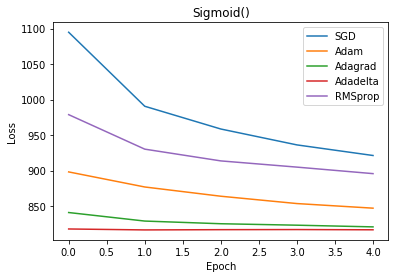

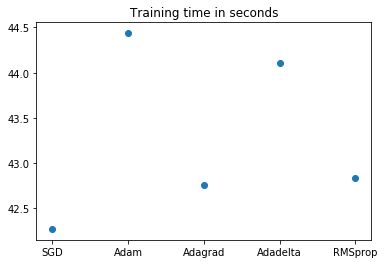

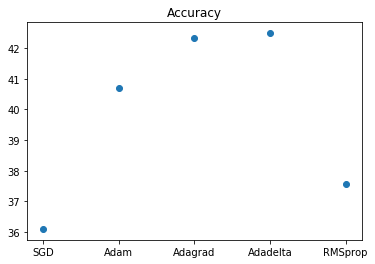

In [0]:
#  USE GPU FOR MODEL  #
#######################
import time

criterion = nn.CrossEntropyLoss().to(avDev)
optimizers = ['SGD', 'Adam', 'Adagrad', 'Adadelta', 'RMSprop']
activation_funcs = [nn.ReLU(), nn.Tanh(), nn.Sigmoid()]
num_epochs = 5
print("Number of epochs: ", num_epochs)


for activation_func in activation_funcs:
  model = LogisticRegressionModel(input_dim,hidden_dim, output_dim, activation_func)
  model.to(avDev)
  print("##### Activation Function:", activation_func, "#####")
  time_taken = []
  accuracy_list = []
  for optim in optimizers:
    if optim == 'SGD':
      optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay = 10e-4)
    elif optim == 'Adam':
      optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay = 10e-4)
    elif optim == 'Adagrad':
      optimizer = torch.optim.Adagrad(model.parameters(), lr=0.001, weight_decay = 10e-4)
    elif optim == 'Adadelta':
      optimizer = torch.optim.Adadelta(model.parameters(), lr=0.001, weight_decay = 10e-4)
    elif optim == 'RMSprop':
      optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay = 10e-4)

    print("Optimizer:", optim)
    
    # Training the model on trainset
    model = train_model(model, optimizer, num_epochs)

    # Testing the model on testset
    test_model(model)

  plt.title(activation_func)
  plt.show()
  plt.scatter(optimizers, time_taken)
  plt.title("Training time in seconds")
  plt.show()
  plt.scatter(optimizers, accuracy_list)
  plt.title("Accuracy")
  plt.show()